<a href="https://colab.research.google.com/github/thanhduc17/hoc_may_1/blob/main/h%E1%BB%8Dc_m%C3%A1y_kh%C3%B4ng_gi%C3%A1m_s%C3%A1t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
!pip3 install missingno
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import files
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import normalize, scale
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.datasets import load_iris  # Thêm thư viện load_iris từ sklearn.datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [ ]:
data= files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
file_name = list(data.keys())[0]
with open(file_name, 'wb') as f:
    f.write(data[file_name])

# Đọc dữ liệu vào DataFrame
df = pd.read_csv(file_name)

# Kiểm tra thông tin của DataFrame
print(df.info())

# Tiến hành các bước làm sạch dữ liệu
# Ví dụ: Xử lý giá trị thiếu, loại bỏ cột không cần thiết, chuyển đổi kiểu dữ liệu, ...

# Hiển thị một số dòng đầu của DataFrame sau khi làm sạch
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
df.duplicated().sum()

1

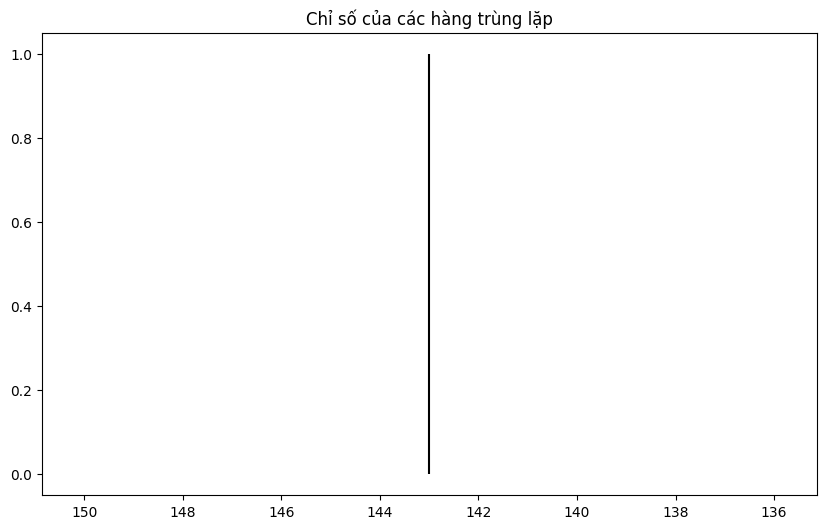

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load bộ dữ liệu Iris
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_df['target_names'] = iris.target_names[iris_df['target'].astype(int)]

# Lưu DataFrame vào file CSV
iris_df.to_csv('iris_data.csv', index=False)

# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv('iris_data.csv')

# Kiểm tra và xác định các hàng trùng lặp
duplicated_rows = df.duplicated()
duplicates_data = pd.DataFrame({
    'Row': range(1, len(df) + 1),
    'Duplicated': duplicated_rows
})
duplicates_data = duplicates_data[duplicates_data['Duplicated']]

# Vẽ chúng dưới dạng đường thẳng màu đen
plt.figure(figsize=(10, 6))
plt.vlines(x=duplicates_data['Row'], ymin=0, ymax=1, color='black')
plt.gca().invert_xaxis()  # Đảo ngược trục x
plt.title("Chỉ số của các hàng trùng lặp")
plt.show()

# Tiếp tục với phần còn lại của mã làm sạch dữ liệu
# Ví dụ: Xử lý giá trị thiếu, loại bỏ cột không cần thiết, chuyển đổi kiểu dữ liệu, ...


In [ ]:
# Loại bỏ các cột không cần thiết
columns_to_drop = ['target']  # Thêm tên cột muốn loại bỏ
df_cleaned = df.drop(columns=columns_to_drop)

# Tiếp tục với phần còn lại của mã làm sạch dữ liệu
# Ví dụ: Xử lý giá trị thiếu, chuyển đổi kiểu dữ liệu, ...
print(df_cleaned.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  target_names  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  


Các giá trị thiếu trong từng cột:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64


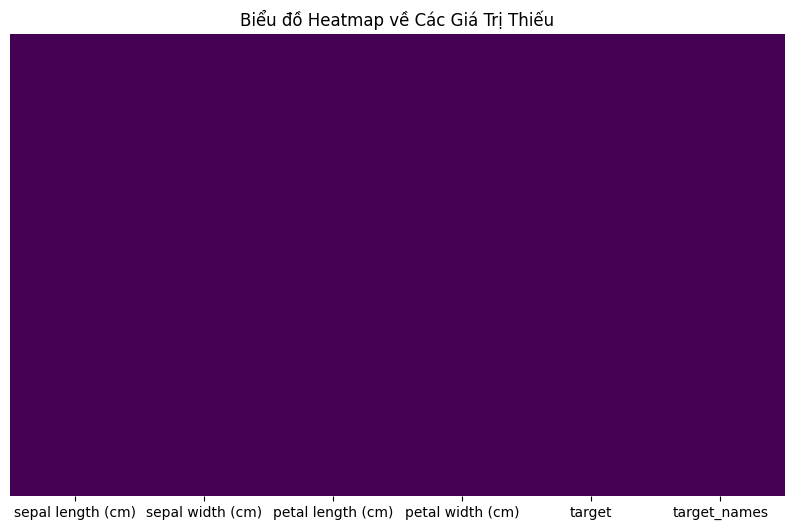

In [ ]:
# Tìm và hiển thị các giá trị thiếu
missing_values = df.isnull().sum()
print("Các giá trị thiếu trong từng cột:")
print(missing_values)

# Hiển thị biểu đồ heatmap về các giá trị thiếu
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Biểu đồ Heatmap về Các Giá Trị Thiếu")
plt.show()

In [ ]:
# Load bộ dữ liệu Iris
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_df['target_names'] = iris.target_names[iris_df['target'].astype(int)]

# Xử lý giá trị ngoại lệ (loại bỏ cột 'sepal width (cm)' có giá trị ngoại lệ)
iris_df = iris_df[iris_df['sepal width (cm)'] < 4.5]

# Xử lý giá trị thiếu (điền giá trị thiếu bằng trung bình)
iris_df['petal length (cm)'].fillna(iris_df['petal length (cm)'].mean(), inplace=True)

# Chuẩn hóa dữ liệu bằng phép chuẩn hóa Z-score
scaler = StandardScaler()
iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

# Loại bỏ cột không cần thiết ('target')
iris_df.drop(columns=['target'], inplace=True)

# Kiểm tra và hiển thị thông tin của DataFrame sau khi xử lý
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_names       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [ ]:


# Load bộ dữ liệu Iris
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_df['target_names'] = iris.target_names[iris_df['target'].astype(int)]

# Định nghĩa bản đồ ánh xạ nhóm cho cột 'sepal length (cm)'
sepal_length_bins = [4.0, 5.0, 6.0, 7.0, 8.0]  # Định nghĩa các khoảng giá trị
sepal_length_labels = ['4-5', '5-6', '6-7', '7-8']  # Đặt nhãn cho các khoảng giá trị
iris_df['grouped_sepal_length'] = pd.cut(iris_df['sepal length (cm)'], bins=sepal_length_bins, labels=sepal_length_labels)

# Hiển thị một số dòng đầu của bộ dữ liệu sau khi nhóm lại
print(iris_df[['sepal length (cm)', 'grouped_sepal_length']].head())


   sepal length (cm) grouped_sepal_length
0                5.1                  5-6
1                4.9                  4-5
2                4.7                  4-5
3                4.6                  4-5
4                5.0                  4-5


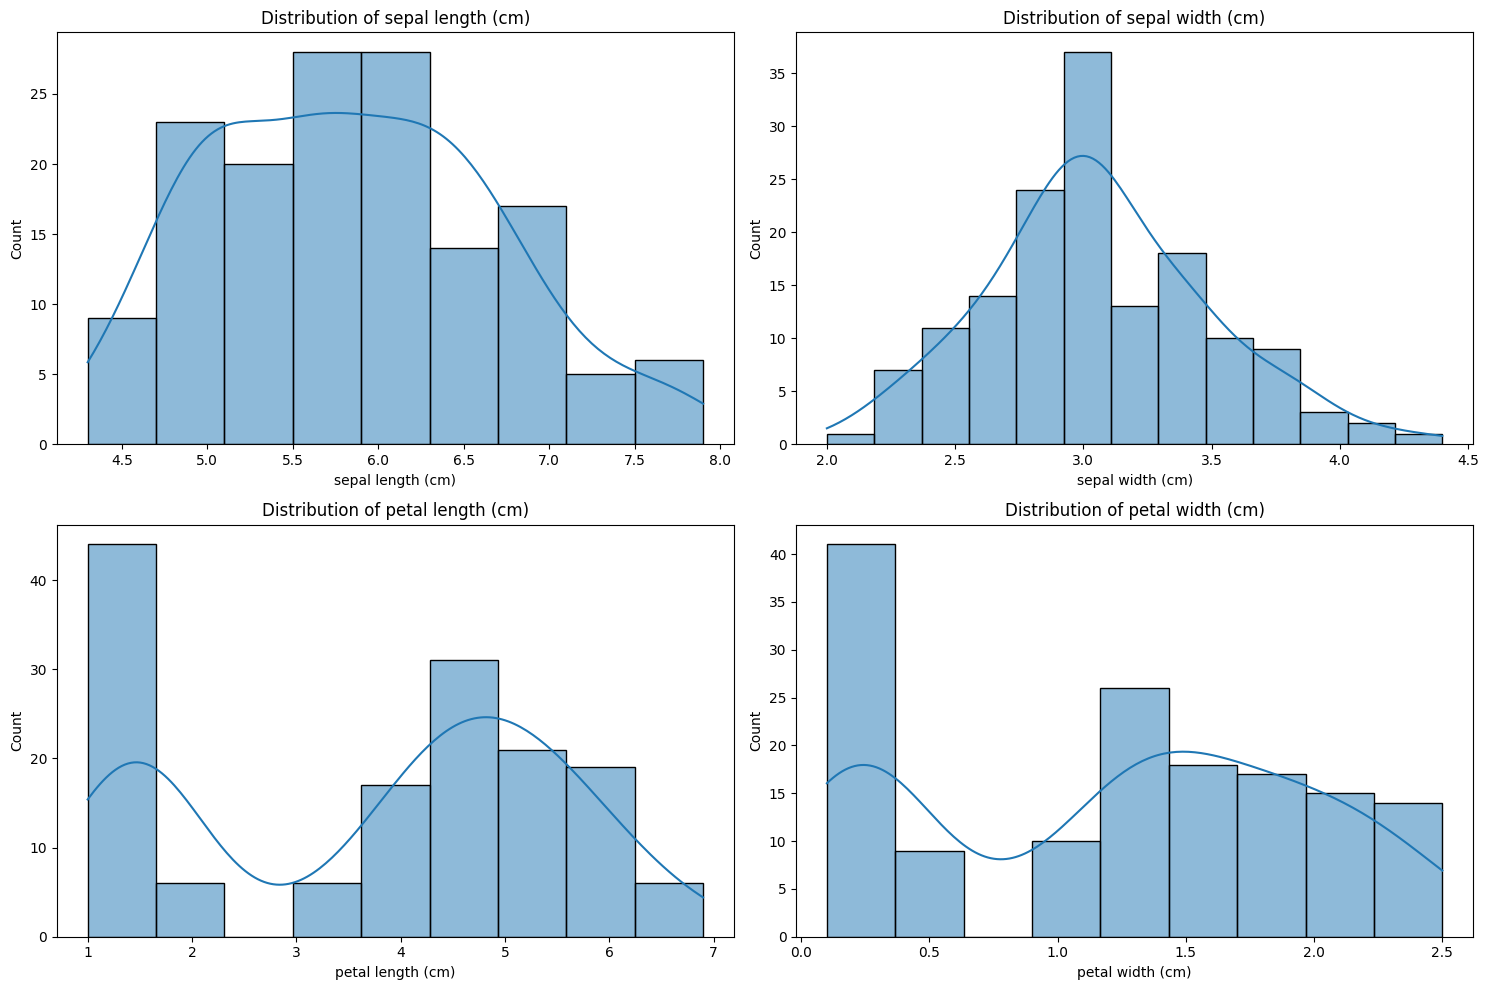

In [ ]:
# Load bộ dữ liệu Iris
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_df['target_names'] = iris.target_names[iris_df['target'].astype(int)]

# Vẽ biểu đồ phân phối của từng thuộc tính
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris['feature_names']):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=iris_df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
iris_df['encoded_species'] = label_encoder.fit_transform(iris_df['target_names'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tạo một bộ dữ liệu đơn giản với cột categorical 'target_names'
data = {'target_names': ['setosa', 'versicolor', 'virginica', 'setosa']}
df = pd.DataFrame(data)

# Sử dụng LabelEncoder để chuyển đổi 'target_names' thành dạng số
label_encoder = LabelEncoder()
df['encoded_species'] = label_encoder.fit_transform(df['target_names'])

# Hiển thị bộ dữ liệu sau khi chuyển đổi
print(df)


  target_names  encoded_species
0       setosa                0
1   versicolor                1
2    virginica                2
3       setosa                0


In [ ]:
import pandas as pd

# Tạo một bộ dữ liệu đơn giản với cột categorical 'target_names'
data = {'target_names': ['setosa', 'versicolor', 'virginica', 'setosa']}
df = pd.DataFrame(data)

# Sử dụng One-Hot Encoding để chuyển đổi 'target_names'
df_encoded = pd.get_dummies(df, columns=['target_names'], prefix=['species'])

# Hiển thị bộ dữ liệu sau khi chuyển đổi
print(df_encoded)


   species_setosa  species_versicolor  species_virginica
0               1                   0                  0
1               0                   1                  0
2               0                   0                  1
3               1                   0                  0


In [ ]:
# Tạo một bộ dữ liệu đơn giản với cột categorical 'target_names'
data = {'target_names': ['setosa', 'versicolor', 'virginica', 'setosa']}
df = pd.DataFrame(data)

# Định nghĩa bản đồ ánh xạ giữa nhãn và giá trị số có thứ bậc
order_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# Sử dụng Ordinal Encoding để chuyển đổi 'target_names' thành giá trị số có thứ bậc
df['encoded_species'] = df['target_names'].map(order_mapping)

# Hiển thị bộ dữ liệu sau khi chuyển đổi
print(df)


  target_names  encoded_species
0       setosa                0
1   versicolor                1
2    virginica                2
3       setosa                0


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_iris

# Load bộ dữ liệu Iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Thêm cột chứa loại hoa (kiểu chuỗi) cho mục đích minh họa
iris_df['species'] = iris.target_names[iris.target]

# Loại bỏ cột kiểu chuỗi trước khi chuẩn hóa
iris_df_numeric = iris_df.drop(['species'], axis=1)

# Chuẩn hoá toàn bộ bộ dữ liệu sử dụng StandardScaler
scaler_standard = StandardScaler()
iris_df_standard = pd.DataFrame(scaler_standard.fit_transform(iris_df_numeric), columns=iris_df_numeric.columns)

# In ra một số dòng đầu của bộ dữ liệu sau khi chuẩn hóa
print(iris_df_standard.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.datasets import load_iris

# Load bộ dữ liệu Iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Tiến hành chuẩn hoá dữ liệu nếu cần
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_df_scaled = scaler.fit_transform(iris_df)

# Số chiều mới bạn muốn giảm về
n_components = 2

# Tạo mô hình PCA
pca = PCA(n_components=n_components)

# Fit và transform dữ liệu
iris_pca = pca.fit_transform(iris_df_scaled)

# Tạo DataFrame mới từ dữ liệu PCA
iris_pca_df = pd.DataFrame(data=iris_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# In ra một số dòng đầu của bộ dữ liệu sau khi giảm chiều
print(iris_pca_df.head())


        PC1       PC2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835


In [ ]:
# Kiểm tra tên cột và sự tồn tại của cột "species"
print("Các cột trong DataFrame:", iris_df.columns)
if 'species' in iris_df.columns:
    print("Cột 'species' tồn tại.")
else:
    print("Cột 'species' không tồn tại.")

# Kiểm tra giá trị của cột "species"
print("Các giá trị trong cột 'species':", iris_df['species'].unique())


Các cột trong DataFrame: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
Cột 'species' tồn tại.
Các giá trị trong cột 'species': ['setosa' 'versicolor' 'virginica']


In [ ]:
print("Các cột trong DataFrame:", iris_df.columns)
if 'species' in iris_df.columns:
    print("Cột 'species' tồn tại.")
    print("Các giá trị trong cột 'species':", iris_df['species'].unique())
else:
    print("Cột 'species' không tồn tại.")

Các cột trong DataFrame: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Cột 'species' không tồn tại.


In [ ]:
# Khôi phục cột "species" vào DataFrame
iris_df['species'] = iris.target_names[iris.target]

# Kiểm tra lại DataFrame sau khi khôi phục cột "species"
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


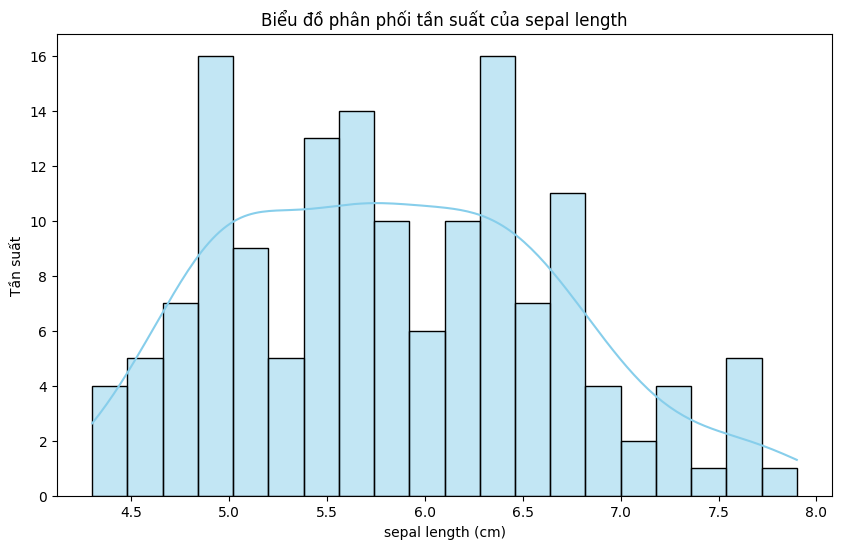

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sử dụng Seaborn để vẽ biểu đồ phân phối tần suất của thuộc tính 'sepal length'
plt.figure(figsize=(10, 6))
sns.histplot(iris_df['sepal length (cm)'], kde=True, bins=20, color='skyblue')
plt.title('Biểu đồ phân phối tần suất của sepal length')
plt.xlabel('sepal length (cm)')
plt.ylabel('Tần suất')
plt.show()


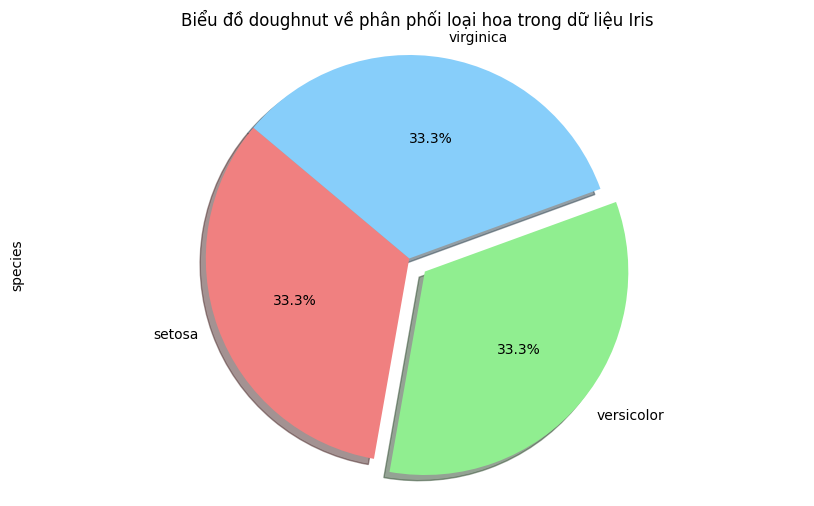

In [ ]:
# Sử dụng Matplotlib để vẽ biểu đồ doughnut về phân phối loại hoa
plt.figure(figsize=(10, 6))
iris_df['species'].value_counts().plot.pie(explode=[0, 0.1, 0], autopct='%1.1f%%', shadow=True, startangle=140, colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.title('Biểu đồ doughnut về phân phối loại hoa trong dữ liệu Iris')
plt.show()


<Figure size 1000x600 with 0 Axes>

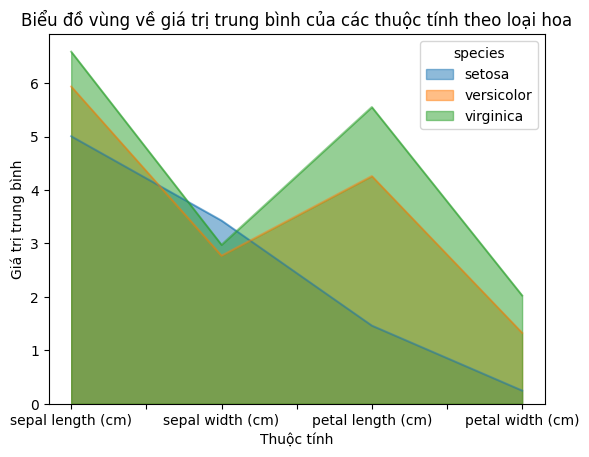

In [ ]:
# Sử dụng Matplotlib để vẽ biểu đồ vùng về giá trị trung bình của các thuộc tính theo loại hoa
avg_values_by_species = iris_df.groupby('species').mean()
plt.figure(figsize=(10, 6))
avg_values_by_species.T.plot(kind='area', alpha=0.5, stacked=False)
plt.title('Biểu đồ vùng về giá trị trung bình của các thuộc tính theo loại hoa')
plt.xlabel('Thuộc tính')
plt.ylabel('Giá trị trung bình')
plt.show()


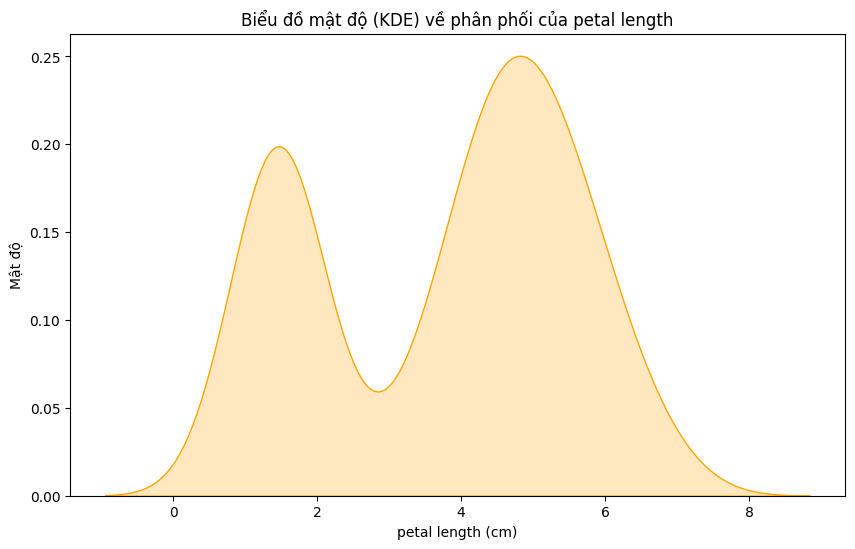

In [ ]:
# Sử dụng Seaborn để vẽ biểu đồ mật độ (KDE) về phân phối của thuộc tính 'petal length'
plt.figure(figsize=(10, 6))
sns.kdeplot(iris_df['petal length (cm)'], fill=True, color='orange')
plt.title('Biểu đồ mật độ (KDE) về phân phối của petal length')
plt.xlabel('petal length (cm)')
plt.ylabel('Mật độ')
plt.show()


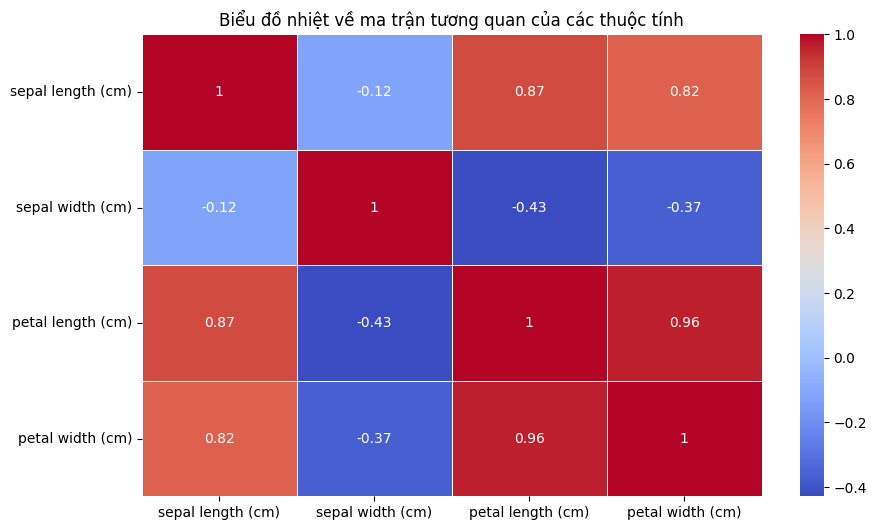

In [ ]:
# Sử dụng Seaborn để vẽ biểu đồ nhiệt về ma trận tương quan của các thuộc tính
plt.figure(figsize=(10, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Biểu đồ nhiệt về ma trận tương quan của các thuộc tính')
plt.show()


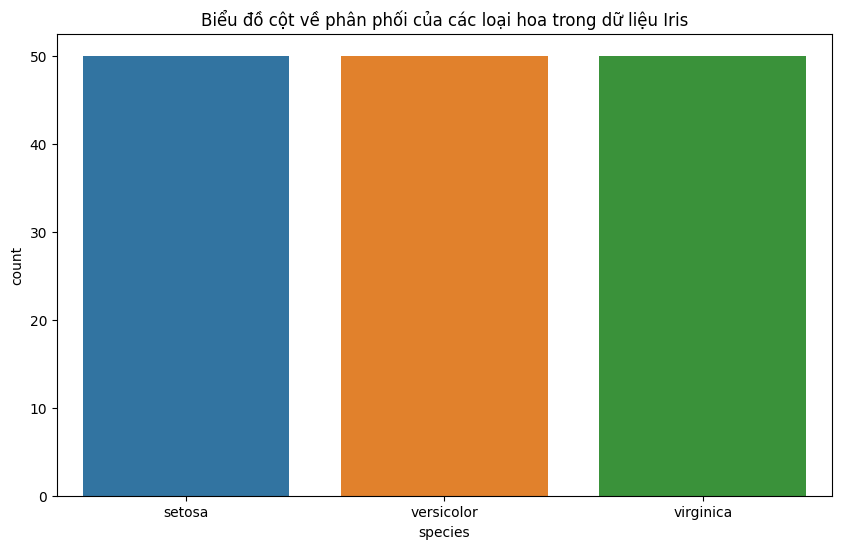

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sử dụng Seaborn để vẽ biểu đồ cột về phân phối của các loại hoa trong dữ liệu Iris
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=iris_df)
plt.title('Biểu đồ cột về phân phối của các loại hoa trong dữ liệu Iris')
plt.show()


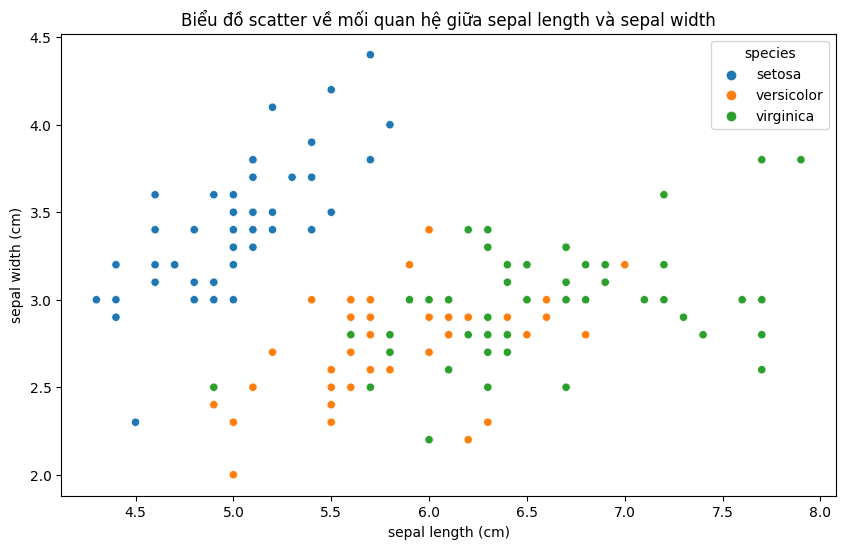

In [ ]:
# Sử dụng Seaborn để vẽ biểu đồ scatter về mối quan hệ giữa các thuộc tính 'sepal length' và 'sepal width'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris_df)
plt.title('Biểu đồ scatter về mối quan hệ giữa sepal length và sepal width')
plt.show()


<Figure size 1000x600 with 0 Axes>

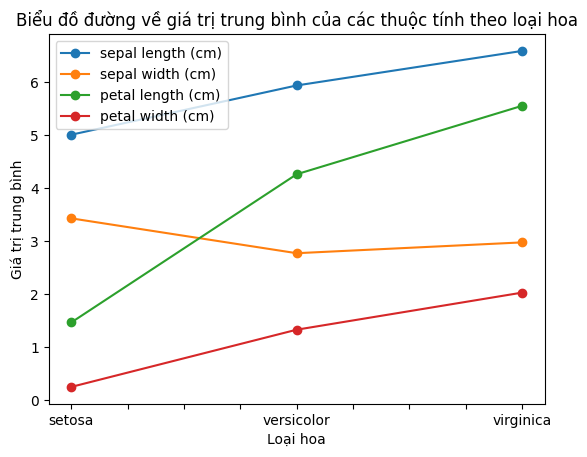

In [ ]:
# Sử dụng Matplotlib để vẽ biểu đồ đường về giá trị trung bình của các thuộc tính theo loại hoa
avg_values_by_species = iris_df.groupby('species').mean()
plt.figure(figsize=(10, 6))
avg_values_by_species.plot(kind='line', marker='o')
plt.title('Biểu đồ đường về giá trị trung bình của các thuộc tính theo loại hoa')
plt.xlabel('Loại hoa')
plt.ylabel('Giá trị trung bình')
plt.show()


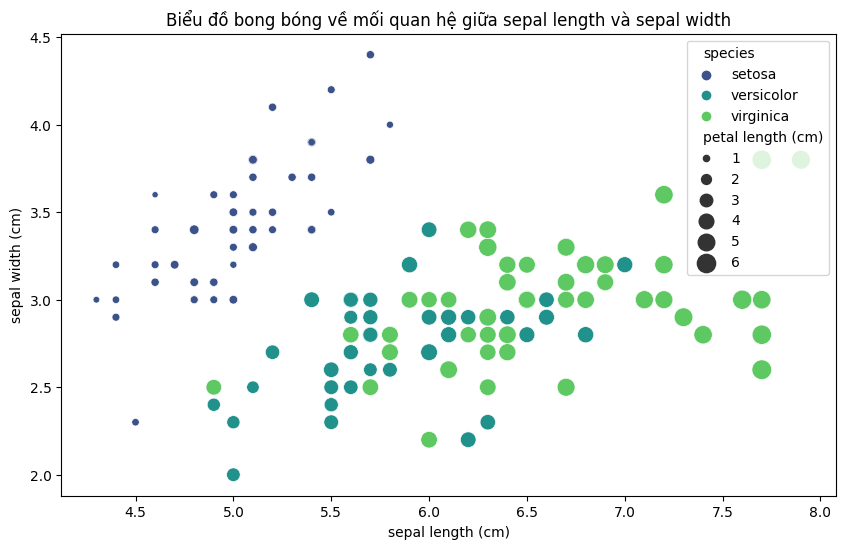

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ bong bóng với mỗi điểm được mô tả bởi 'sepal length' và 'sepal width', kích thước của bong bóng biểu thị 'petal length'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', size='petal length (cm)', sizes=(20, 200), data=iris_df, palette="viridis")
plt.title('Biểu đồ bong bóng về mối quan hệ giữa sepal length và sepal width')
plt.show()



Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



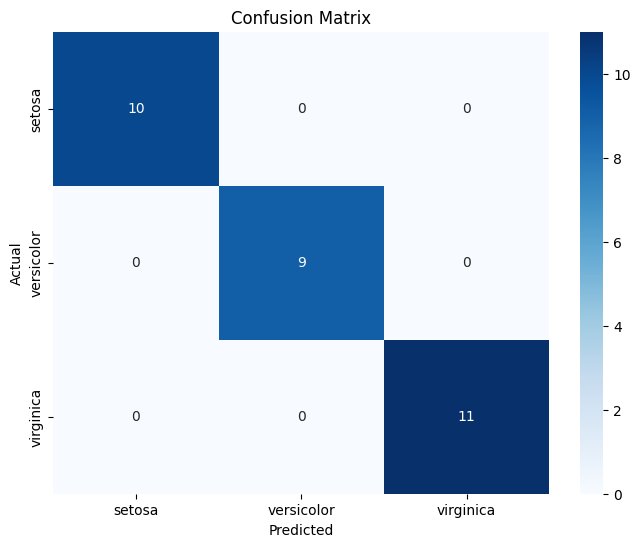

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Chia dữ liệu thành features (X) và target (y)
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình KNN với số láng giềng (k) là 3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Trực quan hóa ma trận nhầm
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Độ dài cánh hoa dựa trên độ dài đài hoa 6: 4.12 cm
Độ dài cánh hoa dựa trên độ dài đài hoa 4: 0.43 cm
R-squared: 0.83
Mean Absolute Error (MAE): 0.64 cm
Root Mean Squared Error (RMSE): 0.80 cm


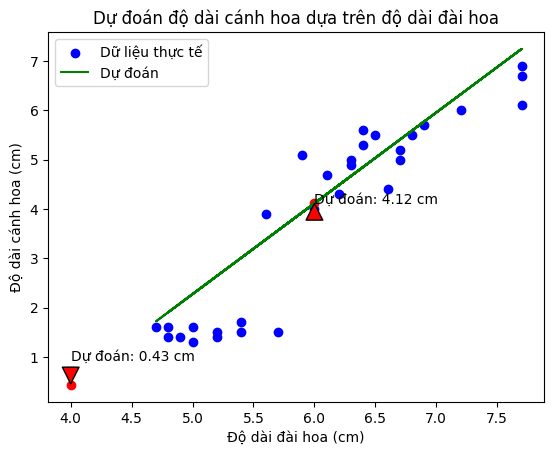

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import datasets

# Load bộ dữ liệu Iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = iris.target

# Chọn các cột dữ liệu
sepal_length = iris_df["sepal length (cm)"]
petal_length = iris_df["petal length (cm)"]

# Tạo mô hình hồi quy tuyến tính
regr = LinearRegression()
X = sepal_length.values.reshape(-1, 1)
y = petal_length.values.reshape(-1, 1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

regr.fit(X_train, y_train)

# Dự đoán độ dài cánh hoa cho độ dài đài hoa 6 và 4 trên tập kiểm thử
y_pred1 = regr.predict(np.array([[6]]))
y_pred2 = regr.predict(np.array([[4]]))

print(f"Độ dài cánh hoa dựa trên độ dài đài hoa 6: {y_pred1[0][0]:.2f} cm")
print(f"Độ dài cánh hoa dựa trên độ dài đài hoa 4: {y_pred2[0][0]:.2f} cm")

# Đánh giá hiệu suất mô hình trên tập kiểm thử
y_pred_test = regr.predict(X_test)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} cm")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} cm")

# Vẽ biểu đồ dự đoán và thực tế trên tập kiểm thử
plt.scatter(X_test, y_test, label='Dữ liệu thực tế', color='blue')
plt.plot(X_test, y_pred_test, color='green', label='Dự đoán')
plt.scatter([6, 4], [y_pred1[0][0], y_pred2[0][0]], color="red")
plt.annotate(f"Dự đoán: {y_pred1[0][0]:.2f} cm", color="black", xy=(6, y_pred1[0][0]), xytext=(6, y_pred1[0][0]), arrowprops=dict(facecolor="red", shrink=0.05))
plt.annotate(f"Dự đoán: {y_pred2[0][0]:.2f} cm", color="black", xy=(4, y_pred2[0][0]), xytext=(4, y_pred2[0][0] + 0.5), arrowprops=dict(facecolor="red", shrink=0.05))
plt.xlabel('Độ dài đài hoa (cm)')
plt.ylabel('Độ dài cánh hoa (cm)')
plt.legend()
plt.title('Dự đoán độ dài cánh hoa dựa trên độ dài đài hoa')
plt.show()



Mean Squared Error (MSE): 0.05


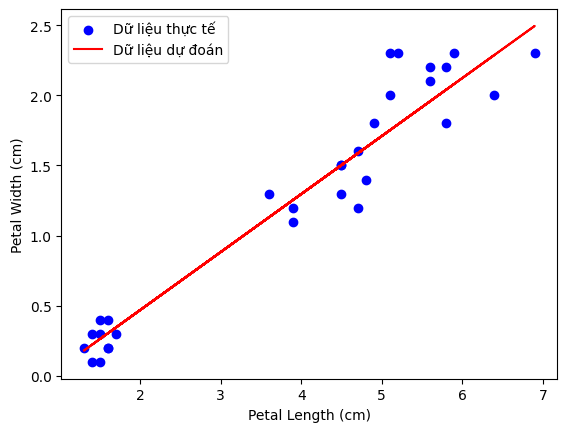

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load bộ dữ liệu iris
iris = datasets.load_iris()
X = iris.data  # Lấy các thuộc tính
y = iris.target  # Lấy nhãn (loại hoa)

# Chọn một thuộc tính để làm biến độc lập và một thuộc tính để làm biến phụ thuộc
X_selected = X[:, 2].reshape(-1, 1)  # Chọn thuộc tính petal length
y_selected = X[:, 3]  # Chọn thuộc tính petal width làm biến phụ thuộc

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Tạo mô hình hồi quy tuyến tính
regressor = LinearRegression()

# Huấn luyện mô hình
regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred = regressor.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Hiển thị biểu đồ dữ liệu thực tế và dữ liệu dự đoán
plt.scatter(X_test, y_test, label='Dữ liệu thực tế', color='blue')
plt.plot(X_test, y_pred, color='red', label='Dữ liệu dự đoán')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()


Accuracy: 1.00


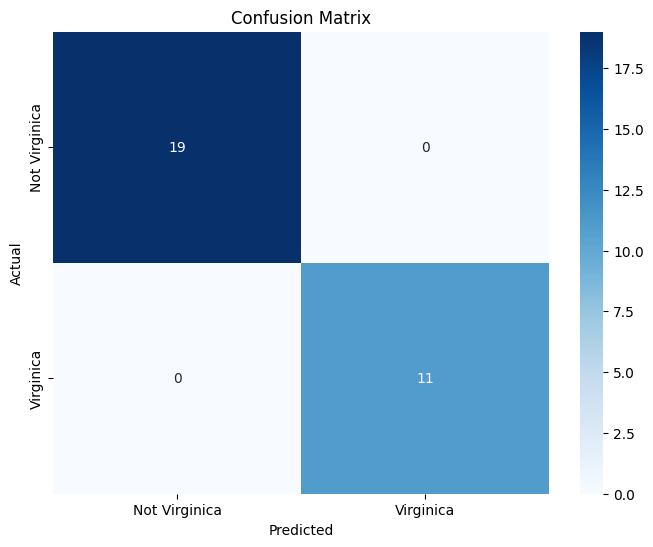

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load bộ dữ liệu Iris
iris = datasets.load_iris()
X = iris.data
y = (iris.target == 2).astype(int)  # Chỉ quan tâm đến loại hoa Iris-Virginica (1) và các loại khác (0)

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Vẽ biểu đồ ma trận phân loại
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Virginica', 'Virginica'], yticklabels=['Not Virginica', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
